In [1]:
import pandas as pd
import utils
import numpy as np
import matplotlib.pyplot as plt
import time as timefn
import scipy.io
import csv
from bs4 import BeautifulSoup

%matplotlib inline

## Download Data from Drive

Getting data from the original sources takes time due to traffic on some of their servers - I compiled everything so far in a Data folder. Download from my Drive:

https://drive.google.com/drive/folders/1cXnuWFnXIfvyq_TeodCP-T0iuQKsJei0?usp=sharing

and put in the repo base folder

Sorry this is so clunky, I know there is a way to automate with Google Drive API but I haven't figured it out yet

To see how to download data from the original sources, see the "Downloading_Data.ipynb"

### Data - Sites

We will show a case study of the using our optimization in 4 situations: 2 different scales (residential vs. industry) and in two locations. For now, I chose the locations as

Santa Maria, CA

Salem, OR

The case study will look at cost savings using our algorithms for the period 11/1/16 to 11/1/17 compared to several "human-input" procedures. Please see Subtask 5: Optimization for more details

## Load Weather Observation and Weather Forecast Data

The weather and weather forecast data is used in many of the subtasks

Weather Observation data is data from weather that actually happened and was recorded. I downloaded data for Salem, OR and Santa Maria, CA for 2016-2017 test year and for 2010 (to compare with solar data)

Weather Forecast data is historical weather forecasts, predicting future hourly data. I downloaded for each data for 2016-2017 test year.

In [413]:
#Weather observation data

#In each of these dataframes, Salem and Santa Maria data are combined

df_weather_2010_HN = pd.read_csv('Data/Weather_Observations/1124193.csv') #NOAA Hourly Normals Dataset
#NOAA Hourly Normals Documentation: https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/NORMAL_HLY_documentation.pdf
#No Hourly normals data for 2016-2017

df_weather_201617_LCD = pd.read_csv('Data/Weather_Observations/1124228.csv') #NOAA Local Climatological Dataset
df_weather_2010_LCD = pd.read_csv('Data/Weather_Observations/1124410.csv')
#NOAA LCD Documentation: https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/LCD_documentation.pdf

/Users/ryanstoddard/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10,11,12,13,14,15,16,17,44,45,46,47,63,64,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/ryanstoddard/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10,11,14,15,20,22,38,64,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


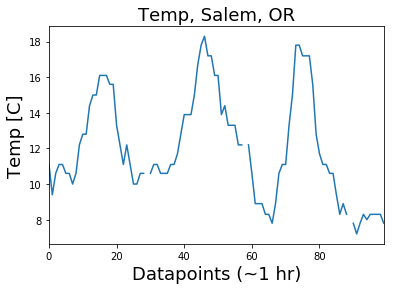

In [414]:
#Example Weather observation data

ax8 = df_weather_201617_LCD.HOURLYDRYBULBTEMPC[:100].plot()
ax8.set_ylabel('Temp [C]', fontsize=18)
ax8.set_xlabel('Datapoints (~1 hr)',fontsize=18)
ax8.set_title('Temp, Salem, OR',fontsize=18)
plt.show()

In [ ]:
#Weather forecast data

#weather forecast data is in .json format it Data/Weather_Forecast folder. I haven't had 
#a chance to parse yet - if you are reading this and have some time implement the parsing here

#The forecast data is what will allow us to make predictions as in a real scenario - we have 
#weather/price/demand/solar data, model a forcast for each for the next 24 hours, then choose 
#how to opperate our PV + battery asset

#each .json file has an hourly forecast, and I downloaded one each 24 hours

#the .csv files have the filenames that correspond to the dates - dates listed in UNIX time format

"""

Forecast Data:

Latitude
Longitude
Time

---

Time in UNIX - convert to datetime for easy printing, fill be field Forecast Time

Ignore: Summary, icon, precip intensity, precip probability (cloud cover precedes precip)

Temp in Fahrenheit (may include Celsius conversion)

Ignore apparent temperature

Dew Point in Fahrenheit (may include Celsius Conversion)

Include humidity (RH%)

Pressure in mb/hPa

Wind speed in mph

Wind bearing in degrees

UV Index

Visibility in miles

=========================

Conversion:

Loop over all files. Filenames contained in CSVs along with output time.
Store data into data frame, keeping only forecasts for the next 24 hours. Each file containes hourly forecasts out to 48 hours.
Store data in different locations in different data frames.
Write end data to CSV, 1 per location. (as we have 2 locations, should only output 2 CSv files.)

"""

salem_filenames = pd.read_csv("Salem_forecast_filenames.csv")
sm_filenames = pd.read_csv("SM_forecast_filenames.csv")

salem_forecast = pd.DataFrame(columns = ("Latitude", "Longitude", "Day" "Forecast_Time", "Temp_F", "DewPoint_F", "Humidity", "Pressure", 
                                        "Wind_Speed", "Wind_Bearing", "UV_Index", "Visibility"))

for file in salem_filenames.Names:
    with open(file) as f:
        latitude = 

# Subtasks


## Subtask 1: Energy price modeling

## Subtask 2: Energy Demand modeling

## Subtask 3: PV output modeling

## Subtask 4: Battery State of Health modeling

## Subtask 5: Optimization Procedure

## 1. Energy Price Modeling

Objective: Predict the Energy price vs. time for one day ahead. This data will go into optimization protocol to decide how to opperate PV + Battery system

Strategy: Use past energy price info with weather observations (and other data as needed) to generate a model to predict energy price data 1 day in advance for 11/1/16 to 11/1/17. Use Weather forecasts for predictions. Compare with real data to make the best possible model. 

Note that to predict the entire test period (11/1/16 to 11/1/17) will probably need to download data 1 year prior (so can get predictions for the earlier time points)

In [416]:
#This section is for parsing the Energy price data for San Luis Obispo, CA
#(Note that I tried multiple nodes in Santa Maria, and they each had 1 or 2 months
#with bad data)
xml_fns = ['20161230_20170129_PRC_LMP_DAM_20171109_22_39_33_v1.xml',
 '20170129_20170226_PRC_LMP_DAM_20171109_22_44_32_v1.xml',
 '20170226_20170326_PRC_LMP_DAM_20171109_22_48_57_v1.xml',
 '20170326_20170425_PRC_LMP_DAM_20171109_22_52_29_v1.xml',
 '20170425_20170524_PRC_LMP_DAM_20171109_22_55_08_v1.xml',
 '20170524_20170623_PRC_LMP_DAM_20171109_22_56_31_v1.xml',
 '20170623_20170722_PRC_LMP_DAM_20171109_22_58_03_v1.xml',
 '20170722_20170821_PRC_LMP_DAM_20171109_22_59_27_v1.xml',
 '20170821_20170920_PRC_LMP_DAM_20171109_23_00_54_v1.xml',
 '20170920_20171019_PRC_LMP_DAM_20171109_23_02_18_v1.xml',
 '20171019_20171101_PRC_LMP_DAM_20171109_23_03_36_v1.xml',
 '20161101_20161130_PRC_LMP_DAM_20171109_22_24_58_v1.xml',
 '20161130_20161230_PRC_LMP_DAM_20171109_22_26_41_v1.xml']

for jj in range(13):
    with open('Data/Energy_Price/' + xml_fns[jj], "r") as src:
        soup = BeautifulSoup(src, "xml")
    if jj == 1:
        df1 = df2
    if jj > 1:
        df1 = df1.append(df2)
    df2 = pd.DataFrame([
    {

        "LMP" : i.VALUE.text if i.DATA_ITEM.text == 'LMP_PRC' else None,
        #"Energy" : i.VALUE.text if i.DATA_ITEM.text == 'LMP_ENE_PRC',
        #"Loss" : i.VALUE.text, if i.DATA_ITEM.text == 'LMP_LOSS_PRC',
        #"Congestion" : i.VALUE.text, if i.DATA_ITEM.text == 'LMP_CONG_PRC',
        "time" : i.INTERVAL_START_GMT.text}
    for i in soup.OASISReport.findChildren("REPORT_DATA")]
    )

    df2 = df2.dropna(axis=0, how='any')
    if jj == 12:
        df1 = df1.append(df2)
    #Need to fix this to get unzipped filename even when already exists
    #utils.remove_data(URL,'zip')

/Users/ryanstoddard/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if sys.path[0] == '':


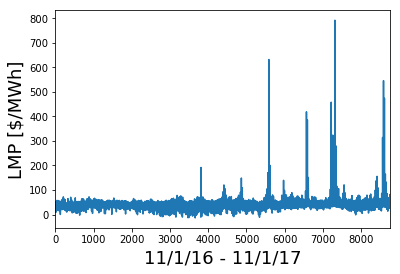

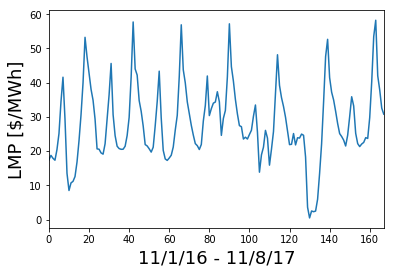

In [418]:
#Take a look at Energy Price Data

df1 = df1.sort_values('time')
df1.shape
#df4 = df1[['LMP']]
#df4 = df4.reset_index(drop=True)
#df4.LMP = df.LMP.astype(float)
#df4.LMP[:80]

df4 = df1.reset_index(drop=True)

df5 = df4.convert_objects(convert_numeric=True)

ax1 = df5.LMP.plot()
ax1.set_ylabel('LMP [$/MWh]', fontsize=18)
ax1.set_xlabel('11/1/16 - 11/1/17',fontsize=18)
plt.show()
ax2 = df5.LMP[:168].plot()
ax2.set_ylabel('LMP [$/MWh]', fontsize=18)
ax2.set_xlabel('11/1/16 - 11/8/17',fontsize=18)
plt.show()


In [419]:
#This section is for parsing the Energy price data (Salem, OR)
xml_fns2 = ['20161101_20161130_PRC_LMP_DAM_20171111_12_04_55_v1.xml',
 '20161130_20161230_PRC_LMP_DAM_20171111_12_09_24_v1.xml',
 '20161230_20170129_PRC_LMP_DAM_20171111_12_14_09_v1.xml',
 '20170129_20170226_PRC_LMP_DAM_20171111_12_19_04_v1.xml',
 '20170226_20170326_PRC_LMP_DAM_20171111_12_23_16_v1.xml',
 '20170326_20170425_PRC_LMP_DAM_20171111_12_26_19_v1.xml',
 '20170425_20170524_PRC_LMP_DAM_20171111_12_29_26_v1.xml',
 '20170524_20170623_PRC_LMP_DAM_20171111_12_30_47_v1.xml',
 '20170623_20170722_PRC_LMP_DAM_20171111_12_32_09_v1.xml',
 '20170722_20170821_PRC_LMP_DAM_20171111_12_33_27_v1.xml',
 '20170821_20170920_PRC_LMP_DAM_20171111_12_34_48_v1.xml',
 '20170920_20171019_PRC_LMP_DAM_20171111_12_36_10_v1.xml',
 '20171019_20171101_PRC_LMP_DAM_20171111_12_37_27_v1.xml']

for jj in range(13):
    with open('Data/Energy_Price/' + xml_fns2[jj], "r") as src:
        soup = BeautifulSoup(src, "xml")
    if jj == 1:
        df1 = df2
    if jj > 1:
        df1 = df1.append(df2)
    df2 = pd.DataFrame([
    {

        "LMP" : i.VALUE.text if i.DATA_ITEM.text == 'LMP_PRC' else None,
        #"Energy" : i.VALUE.text if i.DATA_ITEM.text == 'LMP_ENE_PRC',
        #"Loss" : i.VALUE.text, if i.DATA_ITEM.text == 'LMP_LOSS_PRC',
        #"Congestion" : i.VALUE.text, if i.DATA_ITEM.text == 'LMP_CONG_PRC',
        "time" : i.INTERVAL_START_GMT.text}
    for i in soup.OASISReport.findChildren("REPORT_DATA")]
    )

    df2 = df2.dropna(axis=0, how='any')
    if jj == 12:
        df1 = df1.append(df2)
    #Need to fix this to get unzipped filename even when already exists
    #utils.remove_data(URL,'zip')

/Users/ryanstoddard/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  # This is added back by InteractiveShellApp.init_path()


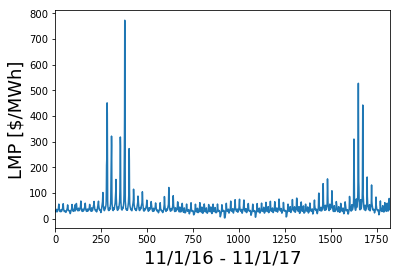

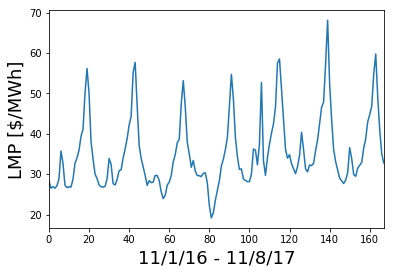

In [420]:
#Take a look at Energy Price Data
df1 = df1.sort_values('time')
df1.shape
#df4 = df1[['LMP']]
#df4 = df4.reset_index(drop=True)
#df4.LMP = df.LMP.astype(float)
#df4.LMP[:80]

df4 = df1.reset_index(drop=True)

df5 = df4.convert_objects(convert_numeric=True)

ax3 = df5.LMP.plot()
ax3.set_ylabel('LMP [$/MWh]', fontsize=18)
ax3.set_xlabel('11/1/16 - 11/1/17',fontsize=18)
plt.show()
ax4 = df5.LMP[:168].plot()
ax4.set_ylabel('LMP [$/MWh]', fontsize=18)
ax4.set_xlabel('11/1/16 - 11/8/17',fontsize=18)
plt.show()


## 2. Model Energy Demand

Objective: Predict the Energy Demand vs. time for one day ahead. This data will go into optimization protocol to decide how to opperate PV + Battery system. 

Strategy: Similar to above, but some added nuances

Note that the data here is for the entire PGE energy massive region in CA, it is just an example. We should subdivide into 4 cases as discussed (residential, industry/server center) * (Santa Maria, Salem). I don't think it makes sense to model single residential home demand (too volatile and not realistic), but we can model blocks of residential homes and industry, to account for differences in the two types of energy use

Some other data may be found on https://www.enernoc.com/ or similar

In [3]:
#This section is for parsing the Energy Demand data for PGE (Pacific Gas and Energy)
xml_fn_demand = ['20161101_20161130_SLD_FCST_ACTUAL_20171112_17_58_16_v1.xml',
'20161101_20161130_SLD_FCST_ACTUAL_20171112_18_00_02_v1.xml',
'20161130_20161230_SLD_FCST_ACTUAL_20171112_18_00_09_v1.xml',
'20161230_20170129_SLD_FCST_ACTUAL_20171112_17_58_27_v1.xml',
'20161230_20170129_SLD_FCST_ACTUAL_20171112_18_00_15_v1.xml',
'20170129_20170226_SLD_FCST_ACTUAL_20171112_18_00_21_v1.xml',
'20170226_20170326_SLD_FCST_ACTUAL_20171112_18_00_27_v1.xml',
'20170326_20170425_SLD_FCST_ACTUAL_20171112_18_00_34_v1.xml',
'20170425_20170524_SLD_FCST_ACTUAL_20171112_18_00_40_v1.xml',
'20170524_20170623_SLD_FCST_ACTUAL_20171112_18_00_46_v1.xml',
'20170623_20170722_SLD_FCST_ACTUAL_20171112_18_00_53_v1.xml',
'20170722_20170821_SLD_FCST_ACTUAL_20171112_18_00_59_v1.xml',
'20170821_20170920_SLD_FCST_ACTUAL_20171112_18_01_05_v1.xml',
'20170920_20171019_SLD_FCST_ACTUAL_20171112_18_01_11_v1.xml',
'20171019_20171101_SLD_FCST_ACTUAL_20171112_18_01_17_v1.xml']

for jj in range(13):
    with open('Data/Energy_Demand/' + xml_fn_demand[jj], "r") as src:
        soup = BeautifulSoup(src, "xml")
    if jj == 1:
        df1 = df2
    if jj > 1:
        df1 = df1.append(df2)
    df2 = pd.DataFrame([
    {

        "DEM_MW" : i.VALUE.text if i.RESOURCE_NAME.text == 'PGE-TAC' else None,
        #"Energy" : i.VALUE.text if i.DATA_ITEM.text == 'LMP_ENE_PRC',
        #"Loss" : i.VALUE.text, if i.DATA_ITEM.text == 'LMP_LOSS_PRC',
        #"Congestion" : i.VALUE.text, if i.DATA_ITEM.text == 'LMP_CONG_PRC',
        "time" : i.INTERVAL_START_GMT.text}
    for i in soup.OASISReport.findChildren("REPORT_DATA")]
    )

    df2 = df2.dropna(axis=0, how='any')
    if jj == 12:
        df1 = df1.append(df2)
    #Need to fix this to get unzipped filename even when already exists
    #utils.remove_data(URL,'zip')

/Users/ryanstoddard/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  import sys


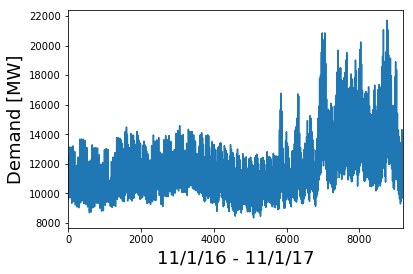

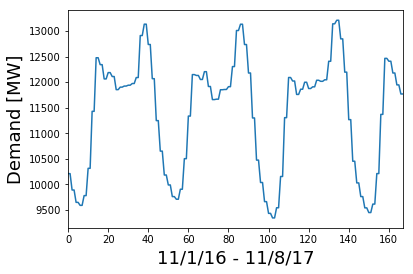

In [4]:
#Take a look at Energy Demand Data
df1 = df1.sort_values('time')
df1.shape

df8 = df1.reset_index(drop=True)

df9 = df8.convert_objects(convert_numeric=True)

ax6 = df9.DEM_MW.plot()
ax6.set_ylabel('Demand [MW]', fontsize=18)
ax6.set_xlabel('11/1/16 - 11/1/17',fontsize=18)
plt.show()

ax7 = df9.DEM_MW[:168].plot()
ax7.set_ylabel('Demand [MW]', fontsize=18)
ax7.set_xlabel('11/1/16 - 11/8/17',fontsize=18)
plt.show()

## 3. Model PV Output

Objective: Predict the PV Output vs time 1 day ahead, send that predicted output to optimization procedure

Strategy: Correlate NREL solar data to PV output. Ultimately, link the solar data / PV output to weather data that can be predicted by forecasts. Both the observations and the forcast datasets have several variables related to cloud cover, etc. Of course time of year and time of day is very important

Also, we can decide if we wan't to specify more details about our PV asset. For example, we can use Project sunroof to give a more accurate link between solar irradiance and PV output based on tilt, etc.

In [272]:
#Load Solar Data 
df_SM_solar = pd.read_csv('Solar_Data/723940_2010_solar.csv')
df_Salem_solar = pd.read_csv('Solar_Data/726940_2010_solar.csv')

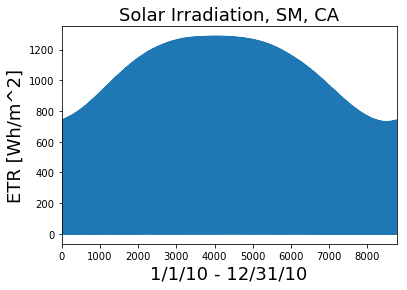

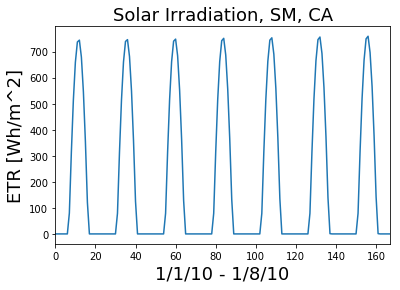

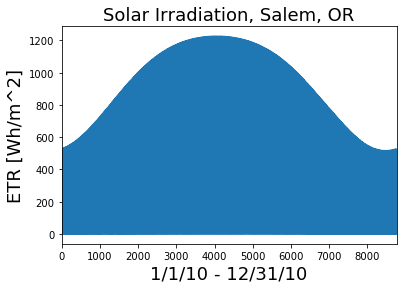

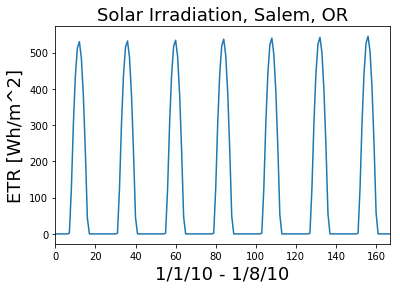

In [273]:

#Don't know how to query col w/ space in name
df_SM_solar = df_SM_solar.rename(columns={'ETR (Wh/m^2)': 'ETR'})


ax5 = df_SM_solar.ETR.plot() #Don't think this var accounts for clouds, look at other cols
ax5.set_ylabel('ETR [Wh/m^2]', fontsize=18)
ax5.set_xlabel('1/1/10 - 12/31/10',fontsize=18)
ax5.set_title('Solar Irradiation, SM, CA',fontsize=18)
plt.show()

ax6 = df_SM_solar.ETR[:168].plot()
ax6.set_ylabel('ETR [Wh/m^2]', fontsize=18)
ax6.set_xlabel('1/1/10 - 1/8/10',fontsize=18)
ax6.set_title('Solar Irradiation, SM, CA',fontsize=18)
plt.show()

df_Salem_solar = df_Salem_solar.rename(columns={'ETR (Wh/m^2)': 'ETR'})


ax7 = df_Salem_solar.ETR.plot()
ax7.set_ylabel('ETR [Wh/m^2]', fontsize=18)
ax7.set_xlabel('1/1/10 - 12/31/10',fontsize=18)
ax7.set_title('Solar Irradiation, Salem, OR',fontsize=18)
plt.show()

ax8 = df_Salem_solar.ETR[:168].plot()
ax8.set_ylabel('ETR [Wh/m^2]', fontsize=18)
ax8.set_xlabel('1/1/10 - 1/8/10',fontsize=18)
ax8.set_title('Solar Irradiation, Salem, OR',fontsize=18)
plt.show()

## 4. Battery State of Health Modeling

Objective: Given input proposed charging / discharging, what is the impact on life and capacity of the battery?

This is still the most open ended - I downloaded some cycle data but am unsure if this is the right data. More realistically, we will apply some semi-empirical models to create our own dataset, then use this to make a function for capacity and state of helth of the battery as a function of age and number of cycles


In [382]:
#Load battery dataset

URL = 'http://ti.arc.nasa.gov/c/5/'

fn = utils.get_data(URL,'zip')

Extracting zip


In [422]:
#This is still work in progress

mat = scipy.io.loadmat('Data/Battery_cycle_data/B0005.mat')

#not sure what to do with mat. in MATLAB, mat is has a tree structure with data listed 
#for each charge/discharge cycle

## 5. Optimization Procedure

Given the output of the other models, this is where a decision is made on how to opperate the PV + battery asset for the next 24 hours.

To repeat the problem statement, consier the following system:
utillity ---x1---> load |
PV ----x2----> load |
battery ----x3---> load |
PV -----x4-----> battery |
PV -----x5----> sell |
battery ----x6---> sell

find optimum x's given constraints:
x1 + x2 + x3 = load |
x2 + x4 + x5 = PV generation |
battery has constraints (capacity, charge/discharge rate)

This subtask requires at least preliminary progress on other subtasks to function

goal is to compare our optimization solution (in terms of cost) to "human-input" procedures. three relevent human-input procedures to compare against:

1. No battery (x4, x6, x3) = 0
2. Charge / discharge based on fixed schedule (discharge every day at xx PM)
3. Discharge battery when price exceeds XX $/MWh

One of the final outputs of the project is comparing the cost of powering a load with our optimum vs. the #1, #2, and #3 scenarios